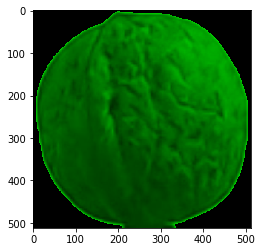

In [1]:
import os
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib
import matplotlib.pyplot as plt

# Path to image folders, 
data_path = fr'../Datasets/train'
# os.listdir(data_path)

def remove_white_background(img_as_array):
    for pixels in img_as_array:
        for pixel in pixels:
            if ((256 > pixel[0] > 200) and (256 > pixel[1] > 200) and (256 > pixel[2] > 200)):

                pixel[0] = 0
                pixel[1] = 0
                pixel[2] = 0

    return img_as_array


def redify(img_as_array):
    for pixels in img_as_array:
        for pixel in pixels:
            pixel[1] = 0
            pixel[2] = 0
            
    return img_as_array

                
def greenify(img_as_array):
    for pixels in img_as_array:
        for pixel in pixels:
            pixel[0] = 0
            pixel[2] = 0

    return img_as_array


def blueify(img_as_array):
    for pixels in img_as_array:
        for pixel in pixels:
            pixel[0] = 0
            pixel[1] = 0

    return img_as_array


def process_files(src):
    data = dict()
    
    for subdir in os.listdir(src):
        data[subdir] = {}
        data[subdir]["red"] = []
        data[subdir]["green"] = []
        data[subdir]["blue"] = []
        current_path = os.path.join(src, subdir)
        for file in os.listdir(current_path):
            img = asarray(Image.open(os.path.join(current_path, file)))
            img = remove_white_background(img)
            
            data[subdir]["red"].append(redify(img.copy()))
            data[subdir]["green"].append(greenify(img.copy()))
            data[subdir]["blue"].append(blueify(img.copy()))
            
    return data

processed = process_files(data_path)
            
plt.imshow(processed["Tomato 3"]["green"][0], interpolation="nearest")